#  Word Embedding Demo

In this demo, we will guide you through the basic steps for creating word representations using skip-gram neural network architecture.

In your homework, you will work on the skip-gram neural network architecture for Word2Vec. You will be using Keras to train your model. 

The sample code for skip-gram model is given. Your job is to incorporate the tokenizer model that you created in HomeWork-1 to tokenize raw text and turn it into word vectors.

You must complete the following tasks:
1. Read/clean text files
2. Indexing (Assign a number to each word)
3. Create skip-grams (inputs for your model)
4. Create the skip-gram neural network model
5. Visualization
6. Evaluation (Using pre-trained, not using pre-trained)
    (classify topic from 4 best categories)  (compare)


This notebook assumes you have already installed Tensorflow and Keras with python3 and had GPU enabled. If you run this exercise on GCloud using the provided disk image you are all set.

As a reminder,

### Don't forget to shut down your instance on Gcloud when you are not using it ###

In [1]:
# import matplotlib
# import matplotlib.font_manager as fm

# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# font_manager = fm.FontManager()
# font_manager.addfont('thsarabunnew-webfont.ttf')
# matplotlib.rc('font', family='TH Sarabun New')

In [2]:
%tensorflow_version 2.x
%matplotlib inline
import numpy as np
import pandas as pd
import math
import glob
import re
import random
import collections
import os
import sys
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking, Conv1D, Bidirectional
from tensorflow.python.keras.layers.merge import Dot
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

random.seed(42)

UsageError: Line magic function `%tensorflow_version` not found.


## Step 1: Read/clean text files

The given code can be used to processed the pre-tokenzied text file from the wikipedia corpus. In your homework, you must replace those text files with raw text files.  You must use your own tokenizer to process your text files

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# port shutil
# shutil.copy("/content/drive/MyDrive/FRA 501 IntroNLP&DL/Dataset/wiki.zip", "/content/wiki.zip")
# !unzip -q wiki.zipim

In [5]:
import re
#Step 1: read the wikipedia text file
with open("wiki/thwiki_chk.txt") as f:
    #the delimiter is one or more whitespace characters
    input_text = re.compile(r"\s+").split(f.read()) 
    #exclude an empty string from our input
    input_text = [word for word in input_text if word != ''] 

In [6]:
print("total word count:", len(input_text))

total word count: 36349066


In [7]:
input_text[:10]

['หน้า',
 'หลัก',
 'วิกิพีเดีย',
 'ดำเนินการ',
 'โดย',
 'มูลนิธิ',
 'วิกิ',
 'มีเดีย',
 'องค์กร',
 'ไม่']

## Step 2: Indexing (Assign a number to each word)

The given code below generates an indexed dataset(each word is represented by a number), a dictionary, a reversed dictionary




Your job is to set a threshold for rare words and replace them with "UNK"

+ Please tell how you choose a number for your threshold

In [8]:
import collections
#step 2:Build dictionary and build a dataset(replace each word with its index)
def create_index(input_text):
    
    words = [word for word in input_text ]
    word_count = list()
    #use set and len to get the number of unique words
    word_count.extend(collections.Counter(words).most_common(len(set(words))))
    #include a token for unknown word
    word_count.append(("UNK",0))

    #print out 10 most frequent words
    print(word_count[:10])
    
    dictionary = dict()
    for word in word_count:
        dictionary[word[0]] = len(dictionary)
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    data = list()
    for word in input_text:
        data.append(dictionary[word])

    return data, dictionary, reverse_dictionary

dataset, dictionary, reverse_dictionary=create_index(input_text)
del input_text #just to clear up some memory

[('ที่', 950006), ('ใน', 897329), ('เป็น', 726847), ('และ', 668116), ('การ', 619128), ('มี', 536738), ('ของ', 532237), ('ได้', 508117), (')', 359576), ('"', 357830)]


In [9]:
print("output sample (dataset):",dataset[:10])
print("output sample (dictionary):",{k: dictionary[k] for k in list(dictionary)[:10]})
print("output sample (reverse dictionary):",{k: reverse_dictionary[k] for k in list(reverse_dictionary)[:10]})

output sample (dataset): [228, 207, 2452, 572, 14, 1828, 7148, 3123, 680, 23]
output sample (dictionary): {'ที่': 0, 'ใน': 1, 'เป็น': 2, 'และ': 3, 'การ': 4, 'มี': 5, 'ของ': 6, 'ได้': 7, ')': 8, '"': 9}
output sample (reverse dictionary): {0: 'ที่', 1: 'ใน', 2: 'เป็น', 3: 'และ', 4: 'การ', 5: 'มี', 6: 'ของ', 7: 'ได้', 8: ')', 9: '"'}


In [10]:
len(dictionary) #number of unique words

701355

# Step3: Create skip-grams (inputs for your model)


In [11]:
#หน้า หลัก วิกิพีเดีย ดำเนินการ โดย มูลนิธิ วิกิ มีเดีย องค์กร ไม่ 

In [12]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import skipgrams
import numpy as np
# Step 3: Create data samples 
vocab_size = len(dictionary)
skip_window = 1       # How many words to consider left and right.

sample_set= dataset[:10]
sampling_table = sequence.make_sampling_table(vocab_size)
couples, labels = skipgrams(sample_set, vocab_size, window_size=skip_window, sampling_table=sampling_table)
word_target, word_context = zip(*couples)
word_target = np.array(word_target, dtype="int32")
word_context = np.array(word_context, dtype="int32")


c:\Users\Kla\anaconda3\lib\site-packages\requests\__init__.py:78: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({0}) or chardet ({1}) doesn't match a supported "


In [13]:
print(sample_set)

[228, 207, 2452, 572, 14, 1828, 7148, 3123, 680, 23]


In [14]:
print("output sample (reverse dictionary):",{k: reverse_dictionary[k] for k in list(sample_set)})

output sample (reverse dictionary): {228: 'หน้า', 207: 'หลัก', 2452: 'วิกิพีเดีย', 572: 'ดำเนินการ', 14: 'โดย', 1828: 'มูลนิธิ', 7148: 'วิกิ', 3123: 'มีเดีย', 680: 'องค์กร', 23: 'ไม่'}


In [15]:
print(couples, labels)

[[3123, 351761], [3123, 450415], [680, 3123], [3123, 7148], [7148, 1828], [7148, 82929], [3123, 680], [7148, 471682], [680, 23], [680, 369040], [680, 52515], [7148, 3123]] [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]


In [16]:
#หน้า หลัก วิกิพีเดีย ดำเนินการ โดย มูลนิธิ วิกิ มีเดีย องค์กร ไม่ 

n = len(labels)
for i in range(n):
    print(i+1,": ",reverse_dictionary[couples[i][0]],reverse_dictionary[couples[i][1]],labels[i])

1 :  มีเดีย สวยงามเฉิดฉัน 0
2 :  มีเดีย เมะจ 0
3 :  องค์กร มีเดีย 1
4 :  มีเดีย วิกิ 1
5 :  วิกิ มูลนิธิ 1
6 :  วิกิ superbaker 0
7 :  มีเดีย องค์กร 1
8 :  วิกิ นางสาวสุวนันท์ 0
9 :  องค์กร ไม่ 1
10 :  องค์กร (Dewsbury 0
11 :  องค์กร สุธาสินี 0
12 :  วิกิ มีเดีย 1


# Step 4: create the skip-gram model
![Skip-gram model](https://raw.githubusercontent.com/ekapolc/nlp_course/master/HW3/skipgram.png)


In [17]:
len(dictionary)

701355

In [18]:
#reference:  https://github.com/nzw0301/keras-examples/blob/master/Skip-gram-with-NS.ipynb
from tensorflow.keras.layers import Dot
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking, Conv1D, Bidirectional
from tensorflow.keras.models import Sequential, Model
dim_embedddings = 32 #embedding dimension
V = len(dictionary) #Vocab size

#step1: select the embedding of the target word from W
w_inputs = Input(shape=(1, ), dtype='int32')
w = Embedding(V, dim_embedddings)(w_inputs)

#step2: select the embedding of the context word from C
c_inputs = Input(shape=(1, ), dtype='int32')
c  = Embedding(V, dim_embedddings)(c_inputs)

#step3: compute the dot product:w*c
o = Dot(axes=2)([w, c])
o = Reshape((1,), input_shape=(1, 1))(o)

#step4: normailize dot products into probability
o = Activation('sigmoid')(o)

SkipGram = Model(inputs=[w_inputs, c_inputs], outputs=o)
SkipGram.summary()
SkipGram.compile(loss='binary_crossentropy', optimizer='adam')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 32)        22443360    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 32)        22443360    ['input_2[0][0]']                
                                                                                              

In [19]:
print(len(dataset))

36349066


In [20]:
# # Train for 5 epoch
# # it will take roughly 3-4 hours for each epoch
# # PRO TIPS: you don't have to spend too much time training for your homework, you are allowed to do it on a smaller corpus
# dataset = dataset[:int(len(dataset)/40)] # 14 minute
# print("dataset : ", len(dataset))
# for _ in range(5):
#     prev_i=0
#     #it is likely that your GPU won't be able to handle 36 million words
#     #just do it 100000 words at a time
    
#     for i in range(len(dataset)//100000):
#         #generate skipgrams
#         data, labels = skipgrams(sequence=dataset[prev_i*100000:(i*100000)+100000], vocabulary_size=V, window_size=2, negative_samples=4.)
#         x = [np.array(x) for x in zip(*data)]
#         y = np.array(labels, dtype=np.int32)
#         if x:
#             loss = SkipGram.train_on_batch(x, y)
#         prev_i = i 
#         print(loss,i*100000)



In [21]:
# SkipGram.save_weights('my_skipgram32_weights.h5')

In [22]:
# import shutil
# shutil.copy("/content/drive/MyDrive/FRA 501 IntroNLP&DL/Dataset/my_skipgram32_weights.h5","/content/my_skipgram32_weights.h5")

In [23]:
SkipGram.load_weights('my_skipgram32_weights.h5')

In [24]:
#Get weight of the embedding layer
final_embeddings=SkipGram.get_weights()[0]
print(final_embeddings.shape)
print(final_embeddings)

(701355, 32)
[[-0.01351944 -0.04854701  0.00759166 ... -0.03292844 -0.02641977
  -0.02815595]
 [ 0.04979687  0.04460765 -0.05431475 ... -0.08998243  0.06853067
  -0.02357403]
 [ 0.06166982 -0.03522204 -0.08009023 ... -0.08795889  0.00268604
  -0.06742482]
 ...
 [ 0.02120265  0.00332093 -0.01234386 ... -0.0159138  -0.00466975
  -0.04422778]
 [-0.00101845  0.03400365 -0.01931458 ...  0.02626497  0.00181897
  -0.03155515]
 [-0.03107104  0.00056505 -0.02213517 ... -0.02368945  0.00096781
  -0.04702238]]


# Step 5: Visualize the embeddings

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is suited for the visualization of high-dimensional datasets. You don't need to understand t-SNE to complete this course, but it is a very powerful tool of visualizing your word vectors. You can read more about t-SNE here: https://lvdmaaten.github.io/tsne/

In [25]:
# Step 5: Visualize the embeddings.
# Function to draw visualization of distance between embeddings.
#reference: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/word2vec/word2vec_basic.py
# https://pythainlp.github.io/tutorials/notebooks/word2vec_examples.html คำไทย
import matplotlib.font_manager as fm
def plot_with_labels(low_dim_embs, labels, filename="tsne_plot.png"):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(15, 15))  # in inches
    plt.axis('off')
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        prop = fm.FontProperties(fname=f'thsarabunnew-webfont.ttf',size=10)
        plt.annotate(label,
                     fontproperties=prop,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
 
    plt.show()
    plt.savefig(filename)

c:\Users\Kla\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Kla\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


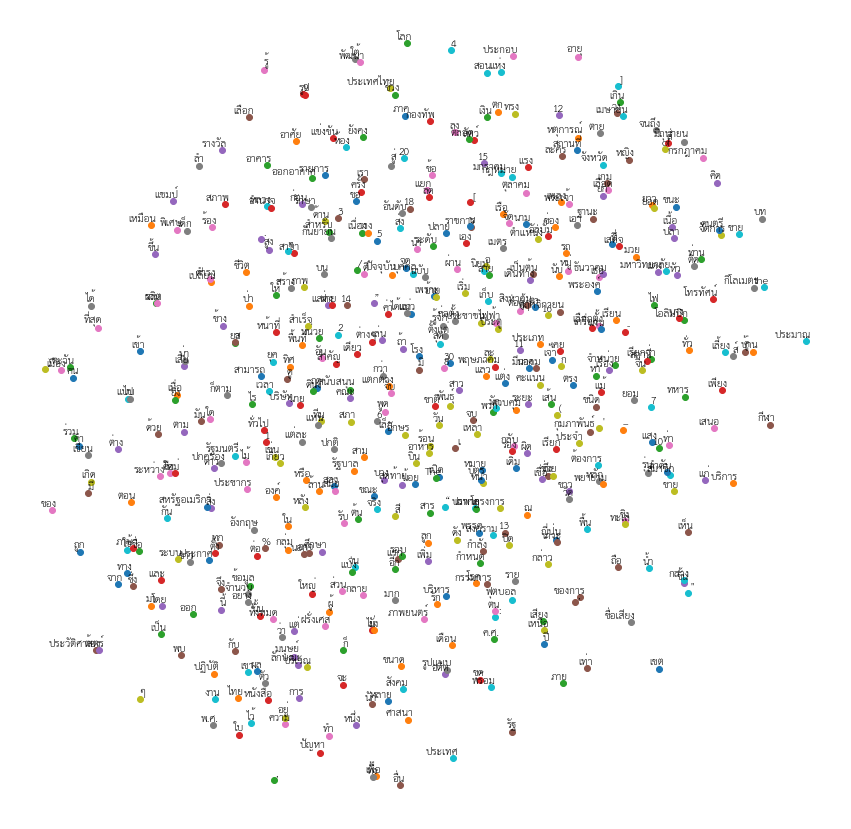

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.font_manager as fm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500)
plot_only = 500 #only top 500 words
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
labels = [reverse_dictionary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

# Visualization: Tensorboard

http://bit.ly/2s0SNHl 

In [27]:
#VISUALIZATION ON TENSORBOARD
#reference: https://github.com/keras-team/keras/pull/5247
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

#you need two files to represent data on tensorboard projector
#1 weights
#2 metadata 
import csv
with open('weights.tsv', 'w') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t')
    writer.writerows(final_embeddings[:10000])

with open('metadata.tsv', 'w') as tsvfile:
    for i in range(10000):
        tsvfile.write(reverse_dictionary[i]+"\n")

# Step 6: Evaluation
"Of course the most important evaluation metric for vector models is extrinsic evaluation
on tasks; adding them as features into any NLP task and seeing whether this
improves performance.

Nonetheless it is useful to have intrinsic evaluations. The most common metric
is to test their performance on similarity, and in particular on computing the
correlation between an algorithm’s word similarity scores and word similarity ratings
assigned by humans" - Dan Jarafsky (reference: https://web.stanford.edu/~jurafsky/slp3/15.pdf)

Cosine similarity is an important metric for measuring similarity between words. In this demo, we will guide you through some examples that you might be able to use to evaluate your models.

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
#sci-kit learns provide a simple module that you can use to calculate cosine similarity
print(cosine_similarity(final_embeddings[dictionary["ธันวาคม"]].reshape(1, -1), final_embeddings[dictionary["ตุลาคม"]].reshape(1, -1)))

[[-0.03263066]]


In [29]:
final_embeddings[dictionary["ประเทศไทย"]]

array([ 0.00468137,  0.00127958, -0.02388866, -0.02840597,  0.01620959,
        0.03746675, -0.01316872,  0.040788  ,  0.04726016,  0.02407246,
        0.05402656, -0.00116745, -0.04468277, -0.00754   , -0.0647027 ,
        0.00902459, -0.00602045, -0.0281846 , -0.01463983, -0.04746029,
       -0.0307648 , -0.05707768, -0.0031582 , -0.01520847, -0.01227265,
        0.06007022,  0.00620638, -0.00287315, -0.05884231,  0.03677147,
       -0.03490867, -0.0375229 ], dtype=float32)

In [30]:
import scipy
#scipy also provides you with a module that you can use to compare your target words against all the words in your corpus
v = final_embeddings[dictionary["สิงหาคม"]].reshape(1, -1)
#just compare with top 10000 words....
all_dist = scipy.spatial.distance.cdist(final_embeddings[:10000], v, 'cosine').reshape(-1)
# get 20 nearest vector 
# argpartition can get top twenty very quickly, but they are not sorted
idx =np.argpartition(all_dist, 20)[:20]
#sort
idx = idx[np.argsort(all_dist[idx[:20]])]

for i in idx:
    print(reverse_dictionary[i])

สิงหาคม
ยึด
ปัก
บิ
1885
สิงห
14
เฟิน
ต่อสู้
เบโก
ค้าง
มุมฉาก
รั
ตนราชสุดาฯ
ตา
แวว
ผ่าตัด
กำลังใจ
ล้างแค้น
อ้อย


In [31]:
print(cosine_similarity(final_embeddings[dictionary["ประเทศไทย"]].reshape(1, -1), final_embeddings[dictionary["ประเทศญี่ปุ่น"]].reshape(1, -1)))
print(cosine_similarity(final_embeddings[dictionary["ประเทศไทย"]].reshape(1, -1), final_embeddings[dictionary["ไส้กรอก"]].reshape(1, -1)))

[[-0.01319707]]
[[0.03223173]]


In [32]:
#to do any visualization you must reduce the dimension of your word vectors to 2D or 3D...
tsne2 = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 10000#only top 10000 words
low_dim_embs2 = tsne2.fit_transform(final_embeddings[:plot_only, :])

c:\Users\Kla\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\Kla\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


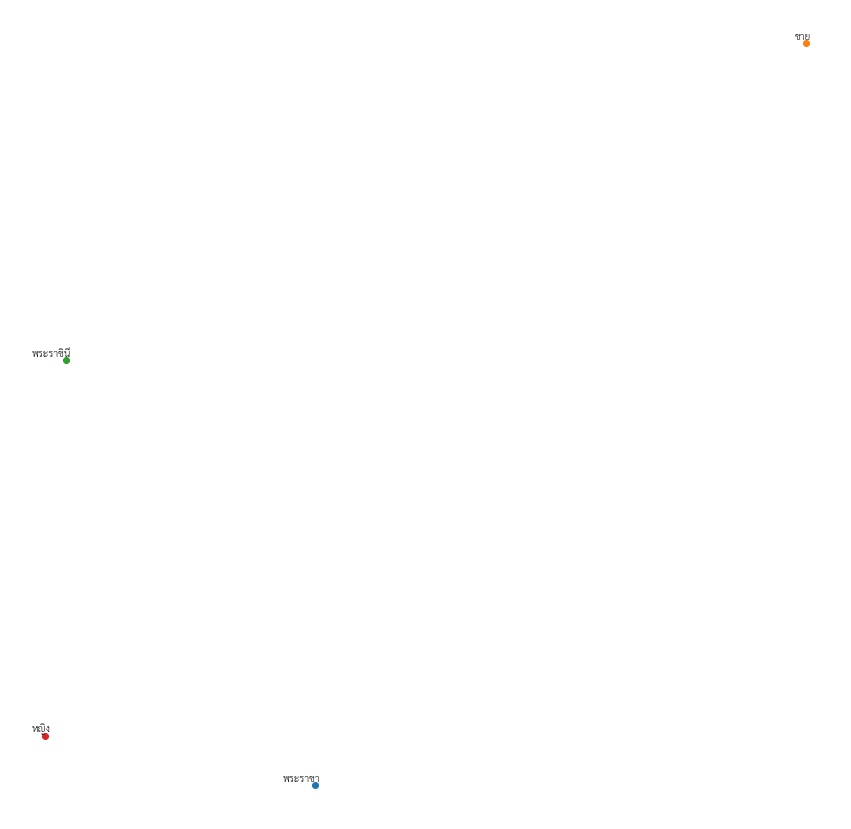

<Figure size 432x288 with 0 Axes>

In [33]:
#Visualizing the famous "king-male+female=queen" 
labels = [reverse_dictionary[i] for i in range(plot_only)]
word_list = ['พระราชา','ชาย','พระราชินี','หญิง']
idx_list = []
for word in word_list:
    idx_list.append(labels.index(word))
word_plot = low_dim_embs2[idx_list]
plot_with_labels(word_plot,word_list,filename="queen_king.png")